# Loan Defaulters

## Introduction

* Your client is an Insurance company and they need your help in building a model to predict whether the policyholder (customer) will pay next premium on time or not.
* An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that you pay regularly to an insurance company for this guarantee.
* Building a model to predict whether a customer would make the premium payment can be extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers who are less likely to pay and convince them to continue making timely payment.
* Now, in order to predict, whether the customer would pay the next premium or not, you have information about past premium payment history for the policyholders along with their demographics (age, monthly income, area type) and sourcing channel etc.

## Data Catalog

| ﻿Variable                         | Definition                                                                                                         |
|----------------------------------|--------------------------------------------------------------------------------------------------------------------|
| id                               | Unique ID of the policy                                                                                            |
| perc_premium_paid_by_cash_credit | Percentage of premium amount paid by cash or credit card                                                           |
| age_in_days                      | Age in days of policy holder                                                                                       |
| Income                           | Monthly Income of policy holder                                                                                    |
| Count_3-6_months_late            | No of premiums late by 3 to 6 months                                                                               |
| Count_6-12_months_late           | No  of premiums late by 6 to 12 months                                                                             |
| Count_more_than_12_months_late   | No of premiums late by more than 12 months                                                                         |
| application_underwriting_score   | Underwriting Score of the applicant at the time of application (No applications under the score of 90 are insured) |
| no_of_premiums_paid              | Total premiums paid on time till now                                                                               |
| sourcing_channel                 | Sourcing channel for application                                                                                   |
| residence_area_type              | Area type of Residence (Urban/Rural)                                                                               |
| target                           | 1 - premium paid on time, 0 - otherwise                                                                            |


## Public and Private Split:

Public leaderboard is based on 40% of the policies, while private leaderboard will be evaluated on the remaining 60% of policies from the test dataset.  

## Data Importing

In [1]:
# importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
# importing data
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
# data shape
train.shape, test.shape

((79853, 12), (34224, 11))

In [4]:
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [5]:
test.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural


In [6]:
train.columns, test.columns

(Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
        'Count_3-6_months_late', 'Count_6-12_months_late',
        'Count_more_than_12_months_late', 'application_underwriting_score',
        'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
        'target'],
       dtype='object'),
 Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
        'Count_3-6_months_late', 'Count_6-12_months_late',
        'Count_more_than_12_months_late', 'application_underwriting_score',
        'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type'],
       dtype='object'))

In [7]:
train.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,1.000000


## Univariate Analysis

### `perc_premium_paid_by_cash_credit`

Convert this into a percentage

In [8]:
train['percentage_premium_paid_cash_credit'] = train.perc_premium_paid_by_cash_credit.apply(lambda x: x * 100)
test['percentage_premium_paid_cash_credit'] = test.perc_premium_paid_by_cash_credit.apply(lambda x: x * 100)

In [9]:
train.percentage_premium_paid_cash_credit.describe(percentiles= [0,0.25,0.5,0.75,0.9,0.95,0.99,1])

count    79853.000000
mean        31.428774
std         33.491457
min          0.000000
0%           0.000000
25%          3.400000
50%         16.700000
75%         53.800000
90%         92.500000
95%        100.000000
99%        100.000000
100%       100.000000
max        100.000000
Name: percentage_premium_paid_cash_credit, dtype: float64

In [10]:
test.percentage_premium_paid_cash_credit.describe(percentiles= [0,0.25,0.5,0.75,0.9,0.95,0.99,1])

count    34224.000000
mean        31.445743
std         33.405873
min          0.000000
0%           0.000000
25%          3.400000
50%         16.900000
75%         54.000000
90%         92.000000
95%        100.000000
99%        100.000000
100%       100.000000
max        100.000000
Name: percentage_premium_paid_cash_credit, dtype: float64

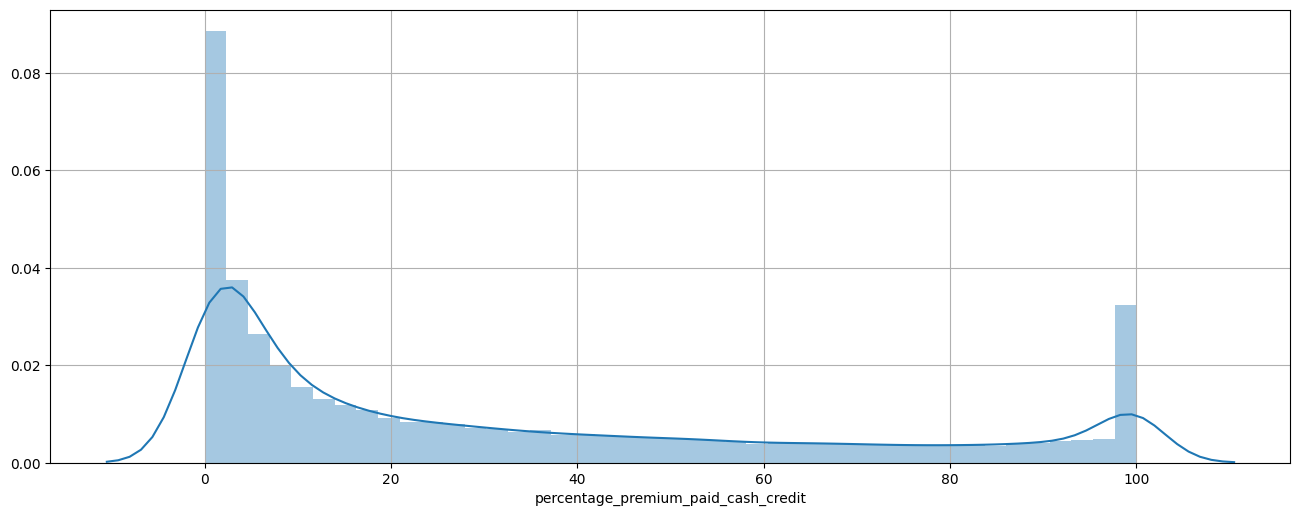

In [11]:
plt.figure(figsize=(16, 6),  dpi= 100)
sns.distplot(train.percentage_premium_paid_cash_credit)
plt.grid()
plt.show()

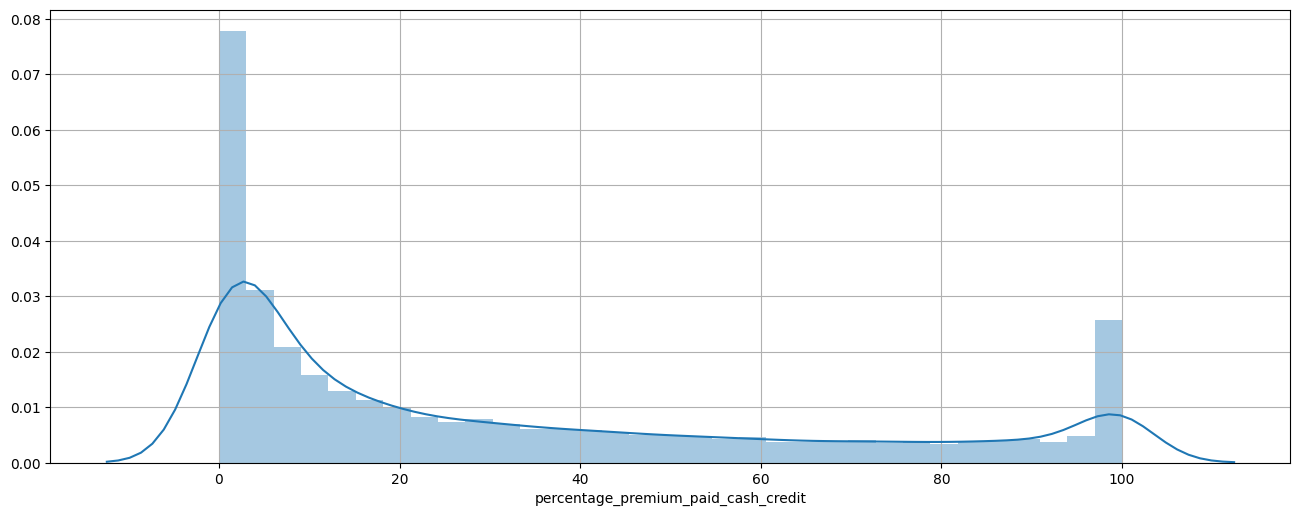

In [12]:
plt.figure(figsize=(16, 6),  dpi= 100)
sns.distplot(test.percentage_premium_paid_cash_credit)
plt.grid()
plt.show()

### `age_in_days`

In [13]:
train.age_in_days.describe()

count    79853.000000
mean     18846.696906
std       5208.719136
min       7670.000000
25%      14974.000000
50%      18625.000000
75%      22636.000000
max      37602.000000
Name: age_in_days, dtype: float64

In [14]:
test.age_in_days.describe()

count    34224.000000
mean     18824.215346
std       5246.525604
min       7671.000000
25%      14972.000000
50%      18623.000000
75%      22636.000000
max      35785.000000
Name: age_in_days, dtype: float64

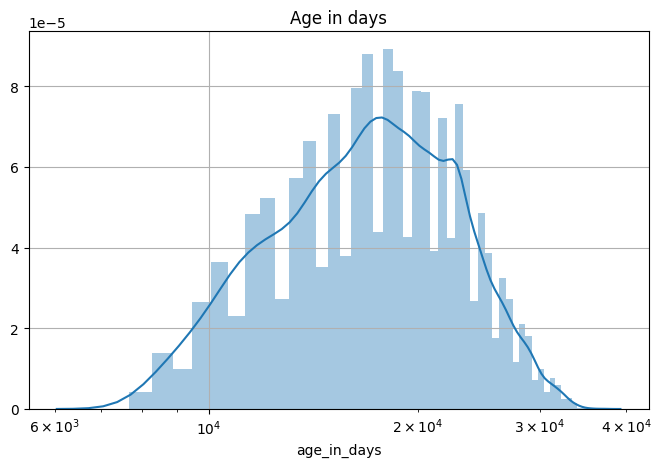

In [15]:
plt.figure(figsize=(8, 5), dpi = 100)
sns.distplot(train.age_in_days)
plt.xscale('log')
plt.title('Age in days')
plt.grid()
plt.show()

### `age_in_years`

Age in days follows a normal distribution at a log scale. Let's convert age in days into years. (Assuming no leap years)

In [16]:
train['age_in_years'] = train.age_in_days.apply(lambda x: x/365)
test['age_in_years'] = test.age_in_days.apply(lambda x: x/365)

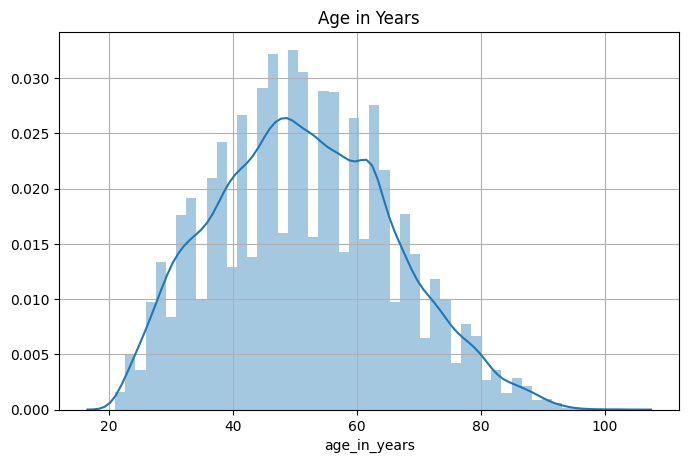

In [17]:
plt.figure(figsize=(8, 5), dpi= 100)
sns.distplot(train.age_in_years)
plt.title('Age in Years')
plt.grid()
plt.show()

Age in years, however, follows a normal distribution.

### `Income`

In [18]:
train.Income.describe(percentiles= [0,0.25,0.5,0.75,0.9,0.95,0.99,1])

count    7.985300e+04
mean     2.088472e+05
std      4.965826e+05
min      2.403000e+04
0%       2.403000e+04
25%      1.080100e+05
50%      1.665600e+05
75%      2.520900e+05
90%      3.574140e+05
95%      4.500500e+05
99%      7.710780e+05
100%     9.026260e+07
max      9.026260e+07
Name: Income, dtype: float64

In [19]:
train.Income.describe(percentiles= [0,0.25,0.5,0.75,0.9,0.95,0.99,1])

count    7.985300e+04
mean     2.088472e+05
std      4.965826e+05
min      2.403000e+04
0%       2.403000e+04
25%      1.080100e+05
50%      1.665600e+05
75%      2.520900e+05
90%      3.574140e+05
95%      4.500500e+05
99%      7.710780e+05
100%     9.026260e+07
max      9.026260e+07
Name: Income, dtype: float64

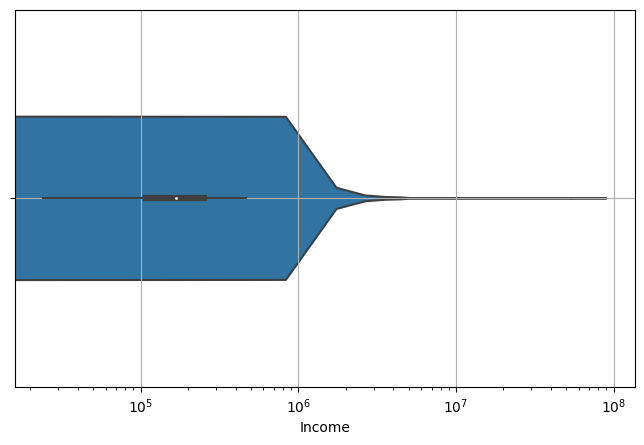

In [20]:
plt.figure(figsize=(8, 5), dpi= 100)
sns.violinplot(train.Income)
plt.xscale('log')
plt.grid()
plt.show()

Most incomes fall below an order of magnitude of 6. Several outliers exists above this range.

### `Count_X_months_late`

#### 3 - 6 Months

In [21]:
train['Count_3-6_months_late'].describe(percentiles= [0,0.25,0.5,0.75,0.9,0.95,0.99,1])

count    79756.000000
mean         0.248671
std          0.691468
min          0.000000
0%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          1.000000
95%          2.000000
99%          3.000000
100%        13.000000
max         13.000000
Name: Count_3-6_months_late, dtype: float64

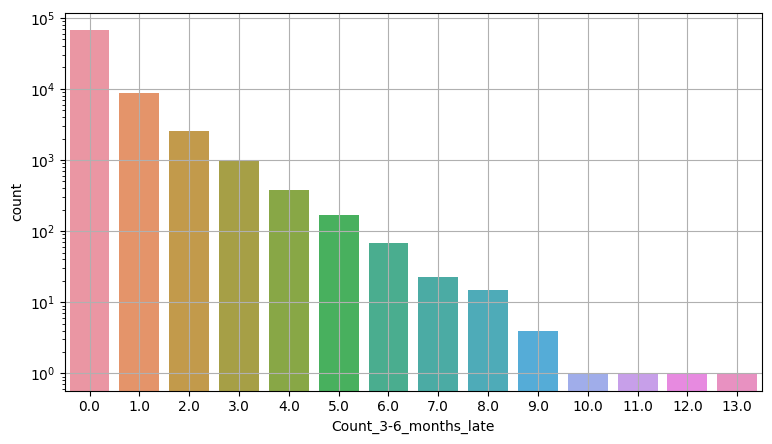

In [22]:
plt.figure(figsize=(9, 5), dpi= 100)
sns.countplot(train['Count_3-6_months_late'])
plt.yscale('log')
plt.grid()
plt.show()

#### 6 - 12 Months

In [23]:
train['Count_6-12_months_late'].describe(percentiles= [0,0.25,0.5,0.75,0.9,0.95,0.99,1])

count    79756.000000
mean         0.078188
std          0.436507
min          0.000000
0%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          0.000000
95%          0.000000
99%          2.000000
100%        17.000000
max         17.000000
Name: Count_6-12_months_late, dtype: float64

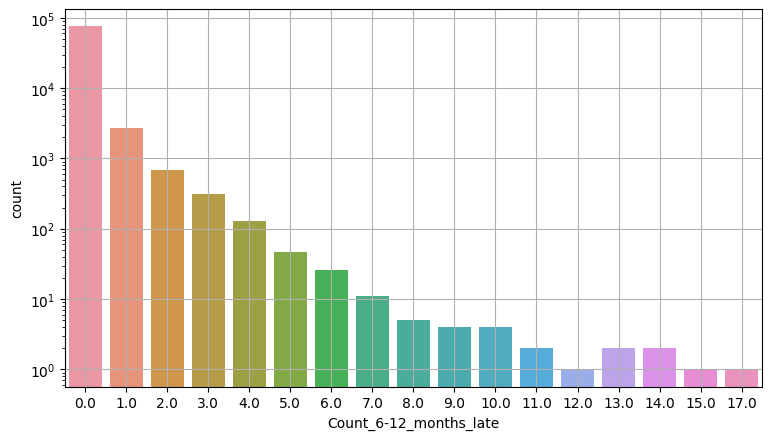

In [24]:
plt.figure(figsize=(9, 5), dpi= 100)
sns.countplot(train['Count_6-12_months_late'])
plt.yscale('log')
plt.grid()
plt.show()

#### Over 12 months late

In [25]:
train['Count_more_than_12_months_late'].describe(percentiles= [0,0.25,0.5,0.75,0.9,0.95,0.99,1])

count    79756.000000
mean         0.060008
std          0.312023
min          0.000000
0%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          0.000000
95%          0.000000
99%          1.000000
100%        11.000000
max         11.000000
Name: Count_more_than_12_months_late, dtype: float64

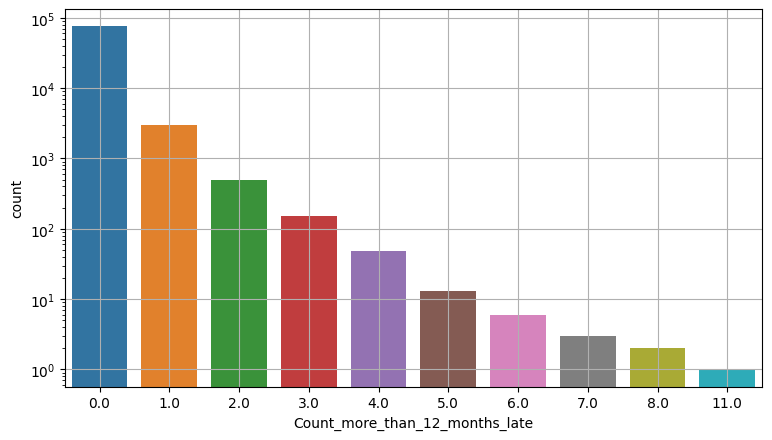

In [26]:
plt.figure(figsize=(9, 5), dpi= 100)
sns.countplot(train['Count_more_than_12_months_late'])
plt.grid(True)
plt.yscale('log')
plt.show()

In [27]:
print(train['Count_3-6_months_late'].median())
print(train['Count_6-12_months_late'].median())
print(train['Count_more_than_12_months_late'].median())

0.0
0.0
0.0


All three distributions in this case have a long right tail. Hereby they are all right tailed distribution with their means close to 0 and their medians being 0.

### `application_underwriting_score`

In [28]:
train.application_underwriting_score.describe(percentiles= [0,0.25,0.5,0.75,0.9,0.95,0.99,1])

count    76879.000000
mean        99.067291
std          0.739799
min         91.900000
0%          91.900000
25%         98.810000
50%         99.210000
75%         99.540000
90%         99.790000
95%         99.870000
99%         99.890000
100%        99.890000
max         99.890000
Name: application_underwriting_score, dtype: float64

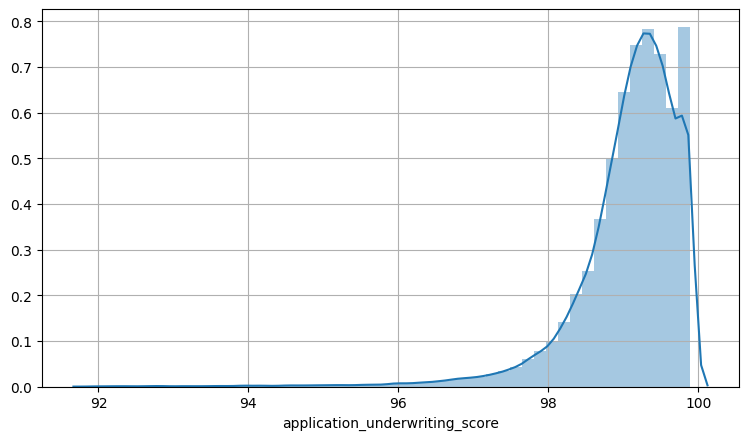

In [29]:
plt.figure(figsize=(9, 5), dpi= 100)
sns.distplot(train[train['application_underwriting_score'].notnull()]['application_underwriting_score'])
plt.grid()
plt.show()

Applications underwriting score is left tailed. Hence, most applicants have a high score.

### `no_of_premiums_paid`

In [30]:
train.no_of_premiums_paid.describe(percentiles= [0,0.25,0.5,0.75,0.9,0.95,0.99,1])

count    79853.000000
mean        10.863887
std          5.170687
min          2.000000
0%           2.000000
25%          7.000000
50%         10.000000
75%         14.000000
90%         18.000000
95%         20.000000
99%         27.000000
100%        60.000000
max         60.000000
Name: no_of_premiums_paid, dtype: float64

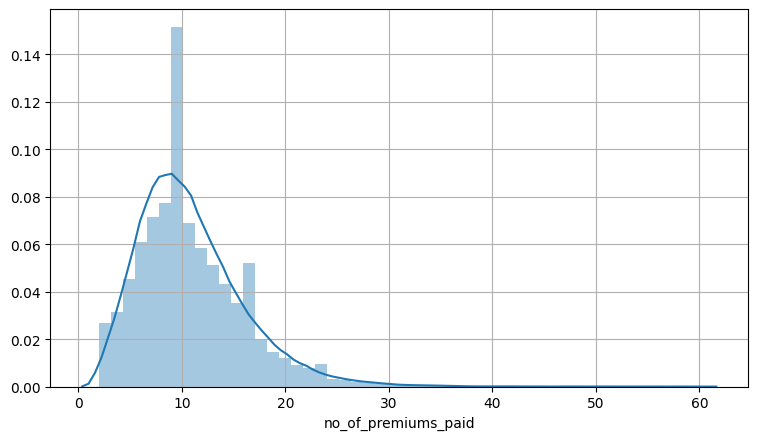

In [31]:
plt.figure(figsize=(9, 5), dpi= 100)
sns.distplot(train.no_of_premiums_paid)
plt.grid()
plt.show()

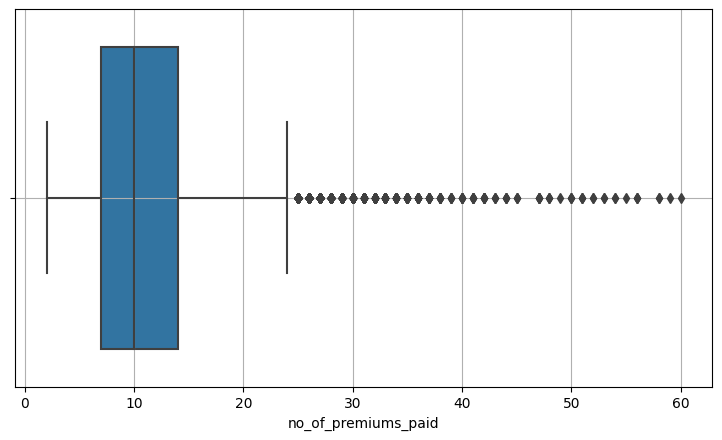

In [32]:
plt.figure(figsize=(9, 5), dpi= 100)
sns.boxplot(train.no_of_premiums_paid)
plt.grid()
plt.show()

Premiums paid follows a normal distribution with a  long left tail. There seem to be outliers above 40 premiums paid.

### `sourcing_channel`

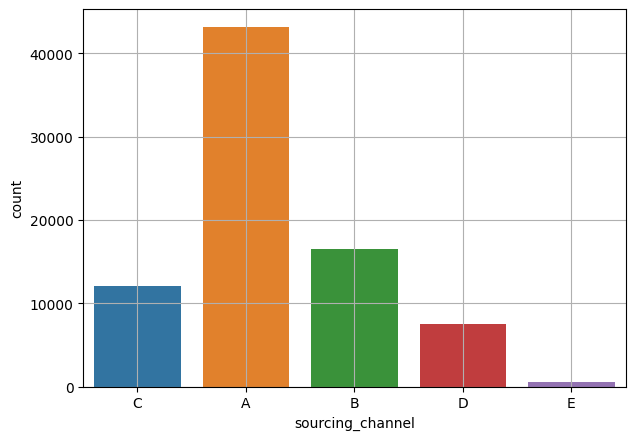

In [33]:
plt.figure(figsize=(7, 5), dpi= 100)
sns.countplot(train.sourcing_channel)
plt.grid(True)
plt.show()

Majority of the customers source from income from channel A.

### `residence_area_type`

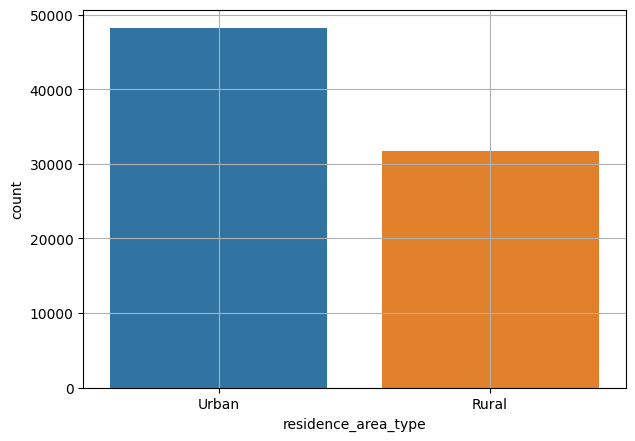

In [34]:
plt.figure(figsize=(7, 5), dpi= 100)
sns.countplot(train.residence_area_type)
plt.grid(True)
plt.show()

## Treating Missing Values

In [35]:
train.isnull().sum()

id                                        0
perc_premium_paid_by_cash_credit          0
age_in_days                               0
Income                                    0
Count_3-6_months_late                    97
Count_6-12_months_late                   97
Count_more_than_12_months_late           97
application_underwriting_score         2974
no_of_premiums_paid                       0
sourcing_channel                          0
residence_area_type                       0
target                                    0
percentage_premium_paid_cash_credit       0
age_in_years                              0
dtype: int64

In [36]:
test.isnull().sum()

id                                        0
perc_premium_paid_by_cash_credit          0
age_in_days                               0
Income                                    0
Count_3-6_months_late                    31
Count_6-12_months_late                   31
Count_more_than_12_months_late           31
application_underwriting_score         1323
no_of_premiums_paid                       0
sourcing_channel                          0
residence_area_type                       0
percentage_premium_paid_cash_credit       0
age_in_years                              0
dtype: int64

We need to treat the following columns (both train and test sets) and remove their missing values:
1. `Count_3-6_months_late`
2. `Count_6-12_months_late`
3. `Count_more_than_12_months_late`
4. `application_underwriting_score`

### No. of Late Premiums

We can assume that any missing values in the `Count_3-6_months_late`, `Count_6-12_months_late`, `Count_more_than_12_months_late` are missing would mean that these customers have had no defaults in the past. 

In [37]:
# filling train data with 0s
train['Count_3-6_months_late'].fillna(0, inplace=True)
train['Count_6-12_months_late'].fillna(0, inplace=True)
train['Count_more_than_12_months_late'].fillna(0, inplace=True)

# filling test data with 0s
test['Count_3-6_months_late'].fillna(0, inplace=True)
test['Count_6-12_months_late'].fillna(0, inplace=True)
test['Count_more_than_12_months_late'].fillna(0, inplace=True)

### Application Underwriting Score

We can assume that this is similar to the credit score. A credit score is a numerical expression based on a level analysis of a person's credit files, to represent the creditworthiness of an individual.

Let us if this is an important factor when determining loan defaulters:

In [38]:
train[train['application_underwriting_score'].notnull()].corr()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target,percentage_premium_paid_cash_credit,age_in_years
id,1.000000,-0.004991,0.005107,0.001460,-0.005209,-0.002739,0.003453,-0.002124,-0.002450,-0.005517,-0.004991,0.005107
perc_premium_paid_by_cash_credit,-0.004991,1.000000,-0.251523,-0.037407,0.219189,0.211828,0.170251,-0.142670,-0.149822,-0.237376,1.000000,-0.251523
age_in_days,0.005107,-0.251523,1.000000,0.036552,-0.057125,-0.069429,-0.059597,0.049888,0.184278,0.092721,-0.251523,1.000000
Income,0.001460,-0.037407,0.036552,1.000000,-0.000857,-0.022187,-0.016297,0.085746,0.104532,0.020331,-0.037407,0.036552
Count_3-6_months_late,-0.005209,0.219189,-0.057125,-0.000857,1.000000,0.210438,0.294580,-0.082882,0.068010,-0.250534,0.219189,-0.057125
Count_6-12_months_late,-0.002739,0.211828,-0.069429,-0.022187,0.210438,1.000000,0.274270,0.004726,-0.091049,-0.288496,0.211828,-0.069429
Count_more_than_12_months_late,0.003453,0.170251,-0.059597,-0.016297,0.294580,0.274270,1.000000,-0.031783,-0.026595,-0.240787,0.170251,-0.059597
application_underwriting_score,-0.002124,-0.142670,0.049888,0.085746,-0.082882,0.004726,-0.031783,1.000000,-0.270864,0.068715,-0.142670,0.049888
no_of_premiums_paid,-0.002450,-0.149822,0.184278,0.104532,0.068010,-0.091049,-0.026595,-0.270864,1.000000,0.019851,-0.149822,0.184278
target,-0.005517,-0.237376,0.092721,0.020331,-0.250534,-0.288496,-0.240787,0.068715,0.019851,1.000000,-0.237376,0.092721


Application Underwriting Score seems to be weakly correlated with all variables, means we cannot replace it via any 

### Decision Tree Regression

We can use decision tree regression instead to replace `application_underwriting_scoring` missing values.

In [39]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  

In [40]:
# training set has no nan
underwriting_score_train = pd.concat([train[train['application_underwriting_score'].notnull()].drop('target', axis = 1), 
                                      test[test['application_underwriting_score'].notnull()]])

In [41]:
# dropping unnecessary columns
underwriting_score_train.drop(['perc_premium_paid_by_cash_credit', 'age_in_days'], axis = 1, inplace = True)

In [42]:
underwriting_score_train = pd.get_dummies(underwriting_score_train)

In [43]:
underwriting_score_training, underwriting_score_validation = train_test_split(underwriting_score_train, test_size=0.1)

In [44]:
underwriting_score_training_X = underwriting_score_training.drop('application_underwriting_score', axis = 1)
underwriting_score_training_Y = underwriting_score_training[['application_underwriting_score']]
underwriting_score_validation_X = underwriting_score_validation.drop('application_underwriting_score', axis = 1)
underwriting_score_validation_Y = underwriting_score_validation[['application_underwriting_score']]

In [45]:
regressor.fit(underwriting_score_training_X, underwriting_score_training_Y) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [46]:
regressor.score(underwriting_score_training_X, underwriting_score_training_Y)

1.0

In [47]:
pred_Y = regressor.predict(underwriting_score_validation_X)

In [48]:
# defining a function which will return the rmse score
def rmse(y, y_):
    y = np.exp(y)
    y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [49]:
rmse(underwriting_score_validation_Y.to_numpy(), pred_Y)

1.055202966221204

Now comparing this rmse with the mean of the values.

In [50]:
rmse(underwriting_score_validation_Y.to_numpy(), underwriting_score_training_Y.mean())

0.7365411129508319

Since the RMSE of the mean is lower, it is better to take the mean of the values instead.

In [51]:
train['application_underwriting_score'].fillna(train[train['application_underwriting_score'].notnull()]['application_underwriting_score'].mean(), inplace=True)
test['application_underwriting_score'].fillna(test[test['application_underwriting_score'].notnull()]['application_underwriting_score'].mean(), inplace=True)

## Bivariate Analysis

### All variables - Correlation Matrix

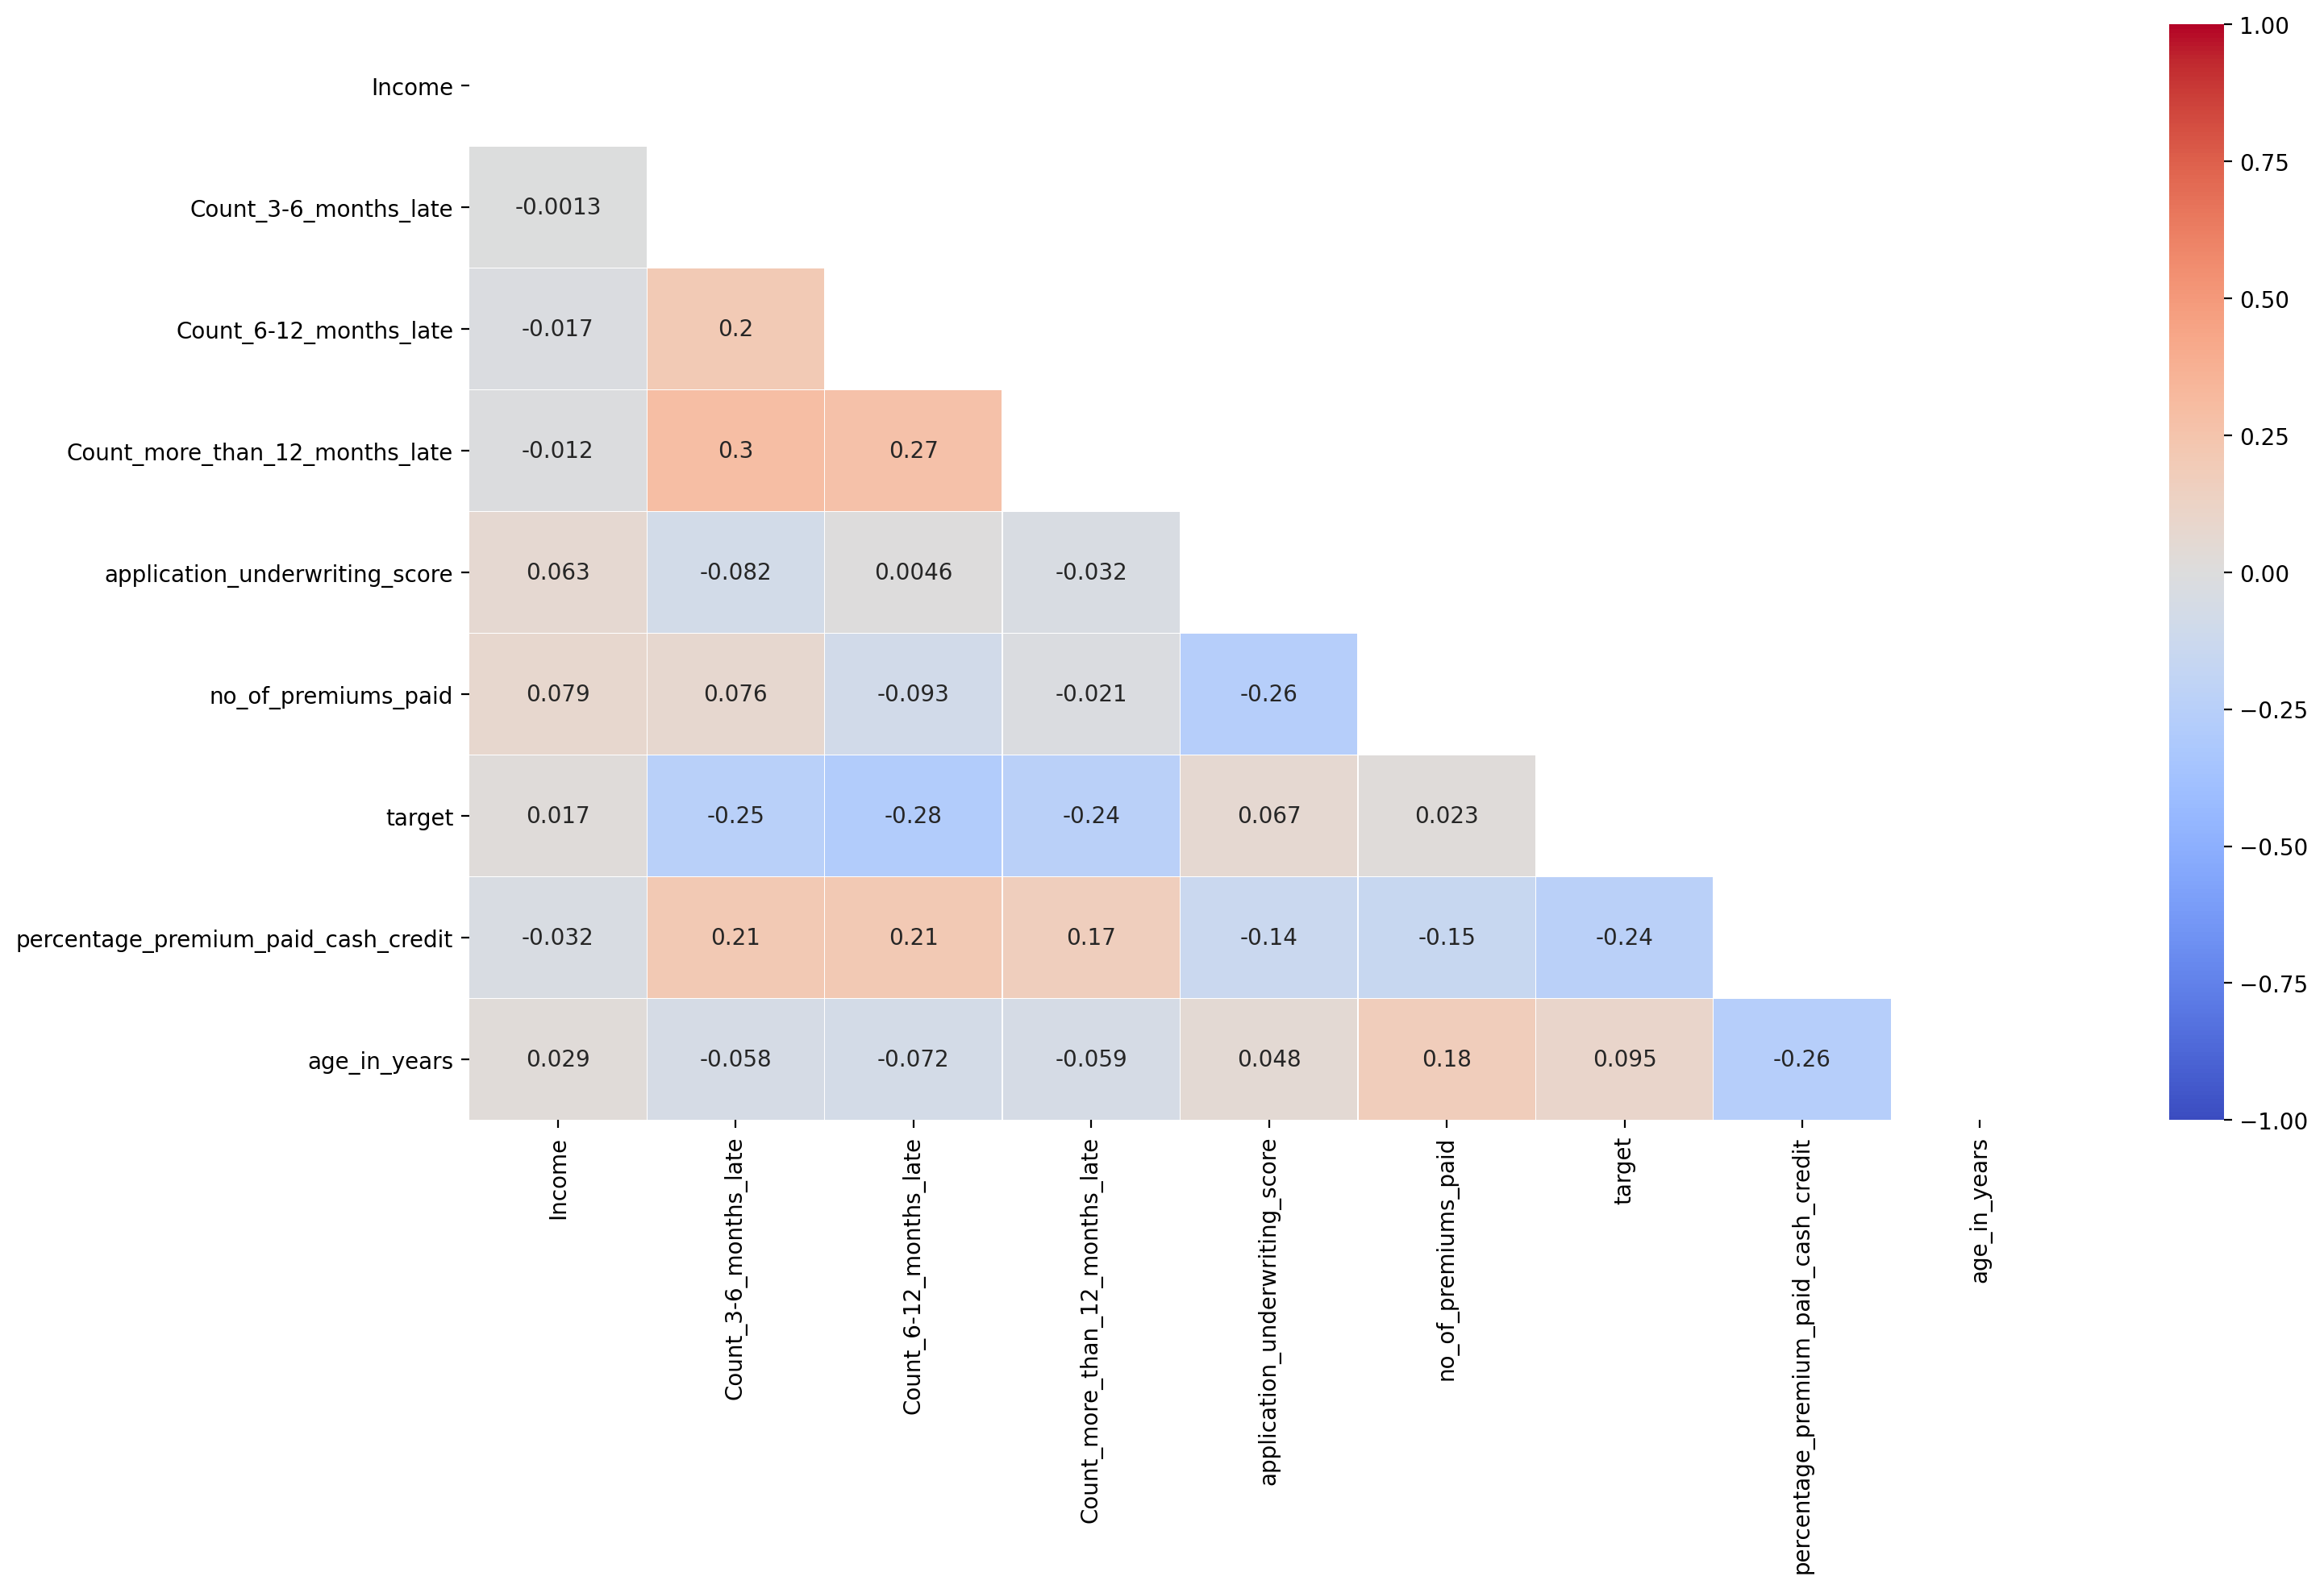

In [52]:
plt.figure(figsize=(16, 9), dpi = 200)
corr_plot = train.drop(['id','perc_premium_paid_by_cash_credit','age_in_days'], axis = 1).corr()
mask = np.zeros_like(corr_plot, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_plot,
            square=False, 
            linewidth=.1,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=True,
            mask = mask)
plt.show()

### `percentage_premium_paid_cash_credit` vs `target`

The percentage premium paid in cash and credit seems to follow a bivariate distribution. This means that there are two major groups that exist. Let us see how the target variable performs in these splits. Assuming that the groups are divided at 85%.

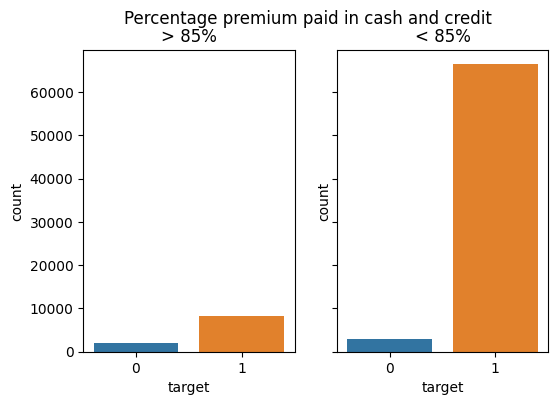

In [53]:
fig, ax = plt.subplots(1, 2, sharey='row', dpi = 100)
ax[0].set_title('> 85%')
sns.barplot(x = 'target', y = 'count', ax = ax[0],
            data = train[train.percentage_premium_paid_cash_credit > 85].groupby('target').nunique()['id'].reset_index().rename(
            columns = {'id': 'count'}))
ax[1].set_title('< 85%')
sns.barplot(x = 'target', y = 'count', ax = ax[1],
            data = train[train.percentage_premium_paid_cash_credit < 85].groupby('target').nunique()['id'].reset_index().rename(
            columns = {'id': 'count'}))
plt.suptitle('Percentage premium paid in cash and credit')
plt.show()

Group with less than 85% is a little more likely to default on a loan.

### `total_count_late` vs `target`

In [54]:
train['total_count_late'] = train['Count_more_than_12_months_late'] + train['Count_6-12_months_late'] + train['Count_3-6_months_late']
test['total_count_late'] = test['Count_more_than_12_months_late'] + test['Count_6-12_months_late'] + test['Count_3-6_months_late']

In [55]:
train[['total_count_late','target']].corr()

,total_count_late,target
total_count_late,1.000000,-0.353315
target,-0.353315,1.000000


### `perc_late_paid` vs `target`

In [56]:
train['perc_late_paid'] = train['total_count_late']/train['no_of_premiums_paid']
test['perc_late_paid'] = test['total_count_late']/test['no_of_premiums_paid']

In [57]:
train[['perc_late_paid','target']].corr()

,perc_late_paid,target
perc_late_paid,1.000000,-0.333177
target,-0.333177,1.000000


### `scaled_underwriting_score` vs `target`

In [58]:
from sklearn import preprocessing

train['scaled_underwriting_score'] = preprocessing.scale(train[['application_underwriting_score']])
test['scaled_underwriting_score'] = preprocessing.scale(test[['application_underwriting_score']])

In [59]:
train[['scaled_underwriting_score','target']].corr()

,scaled_underwriting_score,target
scaled_underwriting_score,1.000000,0.067333
target,0.067333,1.000000


### `scaled_perc_preimum` vs `target`

In [60]:
train['scaled_perc_preimum'] = preprocessing.scale(train[['perc_premium_paid_by_cash_credit']])
test['scaled_perc_preimum'] = preprocessing.scale(test[['perc_premium_paid_by_cash_credit']])

In [61]:
train[['scaled_perc_preimum','target']].corr()

,scaled_perc_preimum,target
scaled_perc_preimum,1.00000,-0.24098
target,-0.24098,1.00000


### Get Dummies

In [62]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

### Correlation Values after Mutation

In [63]:
train.corr()['target'].sort_values()

total_count_late                      -0.353315
perc_late_paid                        -0.333177
Count_6-12_months_late                -0.284034
Count_3-6_months_late                 -0.246469
perc_premium_paid_by_cash_credit      -0.240980
percentage_premium_paid_cash_credit   -0.240980
scaled_perc_preimum                   -0.240980
Count_more_than_12_months_late        -0.238482
sourcing_channel_D                    -0.028412
sourcing_channel_C                    -0.021598
id                                    -0.005064
sourcing_channel_E                    -0.004685
sourcing_channel_B                    -0.004151
residence_area_type_Rural             -0.001667
residence_area_type_Urban              0.001667
Income                                 0.016541
no_of_premiums_paid                    0.022664
sourcing_channel_A                     0.036386
application_underwriting_score         0.067333
scaled_underwriting_score              0.067333
age_in_days                            0

We will only use the top most correlated variables for our models.

## Linear Regression

In [64]:
# breaking the training set into two to check the model
training, validation = train_test_split(train, test_size=0.1)

In [65]:
x_train= training.drop(['target','perc_late_paid','perc_premium_paid_by_cash_credit',
                        'sourcing_channel_D','sourcing_channel_C','sourcing_channel_E',
                       'sourcing_channel_B','residence_area_type_Rural','residence_area_type_Urban',
                       'application_underwriting_score','age_in_days','perc_premium_paid_by_cash_credit'], axis=1)
y_train= training['target']
x_val= validation.drop(['target','perc_late_paid','perc_premium_paid_by_cash_credit',
                        'sourcing_channel_D','sourcing_channel_C','sourcing_channel_E',
                       'sourcing_channel_B','residence_area_type_Rural','residence_area_type_Urban',
                       'application_underwriting_score','age_in_days','perc_premium_paid_by_cash_credit'], axis=1)
y_val= validation['target']

In [66]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

In [67]:
lreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
pred = lreg.predict(x_val)

In [69]:
rmse_test = rmse(pred, y_val)

In [70]:
rmse_test

0.1359896896053316

### Using entire train set on linear regression

In [71]:
X_train = train.drop(['target','perc_late_paid','perc_premium_paid_by_cash_credit',
                        'sourcing_channel_D','sourcing_channel_C','sourcing_channel_E',
                       'sourcing_channel_B','residence_area_type_Rural','residence_area_type_Urban',
                       'application_underwriting_score','age_in_days'], axis=1)
Y_train= train['target']

In [72]:
X_test = test.drop(['perc_late_paid','perc_premium_paid_by_cash_credit',
                        'sourcing_channel_D','sourcing_channel_C','sourcing_channel_E',
                       'sourcing_channel_B','residence_area_type_Rural','residence_area_type_Urban',
                       'application_underwriting_score','age_in_days'], axis=1)

In [73]:
lreg=LinearRegression()

In [74]:
lreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
pred = lreg.predict(X_test)

In [76]:
submission = pd.DataFrame()

In [77]:
submission['id'] = test['id']
submission['target'] = pred

In [78]:
submission.to_csv('submission.csv', index = False)

## Decision Tree Regression

In [79]:
regressor = DecisionTreeRegressor(random_state = 0)  

In [80]:
regressor.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [81]:
regressor.score(x_train, y_train)

1.0

In [82]:
pred_Y = regressor.predict(x_val)

In [83]:
rmse(y_val, pred_Y)

0.1940486452009601

In [84]:
# import export_graphviz 
from sklearn.tree import export_graphviz
  
# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
export_graphviz(regressor, out_file ='tree.dot')  

## CatBoostRegressor

In [85]:
from catboost import CatBoostRegressor

In [86]:
cbr = CatBoostRegressor(iterations=1000, depth=4, learning_rate=0.059, loss_function='RMSE')

In [87]:
cbr.fit(x_train, y_train)

0:	learn: 0.2408611	total: 61.6ms	remaining: 1m 1s
1:	learn: 0.2390453	total: 67.5ms	remaining: 33.7s
2:	learn: 0.2373957	total: 73.3ms	remaining: 24.4s
3:	learn: 0.2358568	total: 80.5ms	remaining: 20s
4:	learn: 0.2344963	total: 86.4ms	remaining: 17.2s
5:	learn: 0.2332163	total: 93.4ms	remaining: 15.5s
6:	learn: 0.2320743	total: 97.4ms	remaining: 13.8s
7:	learn: 0.2311283	total: 101ms	remaining: 12.5s
8:	learn: 0.2302282	total: 107ms	remaining: 11.8s
9:	learn: 0.2294213	total: 111ms	remaining: 11s
10:	learn: 0.2286459	total: 115ms	remaining: 10.3s
11:	learn: 0.2279790	total: 122ms	remaining: 10s
12:	learn: 0.2274189	total: 129ms	remaining: 9.79s
13:	learn: 0.2268690	total: 135ms	remaining: 9.48s
14:	learn: 0.2263740	total: 141ms	remaining: 9.24s
15:	learn: 0.2259483	total: 144ms	remaining: 8.88s
16:	learn: 0.2255407	total: 148ms	remaining: 8.58s
17:	learn: 0.2251428	total: 155ms	remaining: 8.44s
18:	learn: 0.2248054	total: 158ms	remaining: 8.18s
19:	learn: 0.2245013	total: 162ms	remain

179:	learn: 0.2189934	total: 831ms	remaining: 3.79s
180:	learn: 0.2189777	total: 835ms	remaining: 3.78s
181:	learn: 0.2189699	total: 838ms	remaining: 3.77s
182:	learn: 0.2189597	total: 842ms	remaining: 3.76s
183:	learn: 0.2189482	total: 847ms	remaining: 3.76s
184:	learn: 0.2189354	total: 855ms	remaining: 3.77s
185:	learn: 0.2189306	total: 865ms	remaining: 3.79s
186:	learn: 0.2189207	total: 872ms	remaining: 3.79s
187:	learn: 0.2189097	total: 880ms	remaining: 3.8s
188:	learn: 0.2188987	total: 887ms	remaining: 3.81s
189:	learn: 0.2188919	total: 895ms	remaining: 3.82s
190:	learn: 0.2188748	total: 901ms	remaining: 3.82s
191:	learn: 0.2188613	total: 907ms	remaining: 3.82s
192:	learn: 0.2188497	total: 914ms	remaining: 3.82s
193:	learn: 0.2188376	total: 918ms	remaining: 3.81s
194:	learn: 0.2188229	total: 921ms	remaining: 3.8s
195:	learn: 0.2188172	total: 925ms	remaining: 3.79s
196:	learn: 0.2188079	total: 930ms	remaining: 3.79s
197:	learn: 0.2187976	total: 934ms	remaining: 3.78s
198:	learn: 0.

350:	learn: 0.2173997	total: 1.6s	remaining: 2.96s
351:	learn: 0.2173893	total: 1.61s	remaining: 2.96s
352:	learn: 0.2173798	total: 1.61s	remaining: 2.95s
353:	learn: 0.2173681	total: 1.61s	remaining: 2.94s
354:	learn: 0.2173589	total: 1.62s	remaining: 2.94s
355:	learn: 0.2173477	total: 1.62s	remaining: 2.94s
356:	learn: 0.2173359	total: 1.63s	remaining: 2.93s
357:	learn: 0.2173259	total: 1.63s	remaining: 2.92s
358:	learn: 0.2173163	total: 1.64s	remaining: 2.92s
359:	learn: 0.2173033	total: 1.64s	remaining: 2.92s
360:	learn: 0.2172940	total: 1.64s	remaining: 2.91s
361:	learn: 0.2172831	total: 1.65s	remaining: 2.9s
362:	learn: 0.2172763	total: 1.65s	remaining: 2.9s
363:	learn: 0.2172698	total: 1.66s	remaining: 2.89s
364:	learn: 0.2172589	total: 1.66s	remaining: 2.89s
365:	learn: 0.2172438	total: 1.66s	remaining: 2.88s
366:	learn: 0.2172321	total: 1.67s	remaining: 2.88s
367:	learn: 0.2172239	total: 1.67s	remaining: 2.87s
368:	learn: 0.2172164	total: 1.68s	remaining: 2.87s
369:	learn: 0.2

513:	learn: 0.2158568	total: 2.38s	remaining: 2.25s
514:	learn: 0.2158489	total: 2.38s	remaining: 2.24s
515:	learn: 0.2158399	total: 2.39s	remaining: 2.24s
516:	learn: 0.2158293	total: 2.39s	remaining: 2.23s
517:	learn: 0.2158208	total: 2.4s	remaining: 2.23s
518:	learn: 0.2158084	total: 2.4s	remaining: 2.23s
519:	learn: 0.2157952	total: 2.41s	remaining: 2.22s
520:	learn: 0.2157867	total: 2.41s	remaining: 2.22s
521:	learn: 0.2157801	total: 2.42s	remaining: 2.21s
522:	learn: 0.2157705	total: 2.42s	remaining: 2.21s
523:	learn: 0.2157616	total: 2.43s	remaining: 2.21s
524:	learn: 0.2157532	total: 2.43s	remaining: 2.2s
525:	learn: 0.2157451	total: 2.44s	remaining: 2.19s
526:	learn: 0.2157404	total: 2.44s	remaining: 2.19s
527:	learn: 0.2157315	total: 2.44s	remaining: 2.19s
528:	learn: 0.2157299	total: 2.45s	remaining: 2.18s
529:	learn: 0.2157236	total: 2.45s	remaining: 2.18s
530:	learn: 0.2157220	total: 2.46s	remaining: 2.17s
531:	learn: 0.2157134	total: 2.46s	remaining: 2.17s
532:	learn: 0.2

698:	learn: 0.2144806	total: 3.34s	remaining: 1.44s
699:	learn: 0.2144772	total: 3.34s	remaining: 1.43s
700:	learn: 0.2144726	total: 3.35s	remaining: 1.43s
701:	learn: 0.2144664	total: 3.35s	remaining: 1.42s
702:	learn: 0.2144596	total: 3.36s	remaining: 1.42s
703:	learn: 0.2144549	total: 3.37s	remaining: 1.42s
704:	learn: 0.2144500	total: 3.38s	remaining: 1.41s
705:	learn: 0.2144466	total: 3.39s	remaining: 1.41s
706:	learn: 0.2144401	total: 3.4s	remaining: 1.41s
707:	learn: 0.2144356	total: 3.41s	remaining: 1.41s
708:	learn: 0.2144293	total: 3.42s	remaining: 1.4s
709:	learn: 0.2144197	total: 3.42s	remaining: 1.4s
710:	learn: 0.2144133	total: 3.43s	remaining: 1.39s
711:	learn: 0.2144051	total: 3.44s	remaining: 1.39s
712:	learn: 0.2143986	total: 3.44s	remaining: 1.39s
713:	learn: 0.2143954	total: 3.45s	remaining: 1.38s
714:	learn: 0.2143861	total: 3.46s	remaining: 1.38s
715:	learn: 0.2143788	total: 3.46s	remaining: 1.37s
716:	learn: 0.2143759	total: 3.46s	remaining: 1.37s
717:	learn: 0.2

866:	learn: 0.2133919	total: 4.32s	remaining: 663ms
867:	learn: 0.2133791	total: 4.33s	remaining: 658ms
868:	learn: 0.2133674	total: 4.33s	remaining: 653ms
869:	learn: 0.2133626	total: 4.34s	remaining: 648ms
870:	learn: 0.2133572	total: 4.35s	remaining: 644ms
871:	learn: 0.2133454	total: 4.35s	remaining: 639ms
872:	learn: 0.2133397	total: 4.36s	remaining: 634ms
873:	learn: 0.2133355	total: 4.36s	remaining: 629ms
874:	learn: 0.2133232	total: 4.37s	remaining: 624ms
875:	learn: 0.2133146	total: 4.37s	remaining: 619ms
876:	learn: 0.2133070	total: 4.38s	remaining: 614ms
877:	learn: 0.2133003	total: 4.38s	remaining: 609ms
878:	learn: 0.2132937	total: 4.38s	remaining: 604ms
879:	learn: 0.2132858	total: 4.39s	remaining: 599ms
880:	learn: 0.2132832	total: 4.39s	remaining: 594ms
881:	learn: 0.2132775	total: 4.4s	remaining: 589ms
882:	learn: 0.2132701	total: 4.41s	remaining: 585ms
883:	learn: 0.2132634	total: 4.42s	remaining: 579ms
884:	learn: 0.2132615	total: 4.42s	remaining: 575ms
885:	learn: 0

In [88]:
prediction = cbr.predict(x_val)

In [89]:
rmse(y_val, prediction)

0.1343670330957683

In [90]:
pred = cbr.predict(X_test)

In [91]:
submission = pd.DataFrame()

In [92]:
submission['id'] = test['id']
submission['target'] = pred

In [93]:
submission.to_csv('submission-CatBoost.csv', index = False)

### XGBoost

In [94]:
import xgboost as xgb

In [95]:
xgc = xgb.XGBClassifier()

In [96]:
xgc.set_params( **{'colsample_bytree': 0.7,
 'eta': 0.03,
 'gamma': 0.7,
 'max_depth': 2,
 'min_child_weight': 1,
 'n_estimators': 250,
 'subsample': 0.85})

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.7, eta=0.03, gamma=0.7,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=0.85,
              tree_method=None, validate_parameters=False, verbosity=None)

In [97]:
xgc.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eta=0.03, gamma=0.7,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.0299999993, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.85,
              tree_method=None, validate_parameters=False, verbosity=None)

In [98]:
pred_Y = xgc.predict_proba(x_val)

In [99]:
rmse(y_val, pred_Y[:,1])

0.13386315105998514

### Using entire train set on XGBoost

In [100]:
xgc = xgb.XGBClassifier()

In [101]:
xgc.set_params( **{'colsample_bytree': 0.7,
 'eta': 0.03,
 'gamma': 0.7,
 'max_depth': 2,
 'min_child_weight': 1,
 'n_estimators': 250,
 'subsample': 0.85})

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.7, eta=0.03, gamma=0.7,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=0.85,
              tree_method=None, validate_parameters=False, verbosity=None)

In [102]:
xgc.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eta=0.03, gamma=0.7,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.0299999993, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.85,
              tree_method=None, validate_parameters=False, verbosity=None)

In [103]:
pred = xgc.predict_proba(X_test)

In [104]:
submission = pd.DataFrame()

In [105]:
submission['id'] = test['id']
submission['target'] = pred[:,1]

In [106]:
submission.to_csv('submission-XGBoost.csv', index = False)